In [1]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 're', 'edu', 'use', 'one', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'think', 'see', 'rather', 'make', 'seem', 'run', 'need', 'even', 'also', 'may', 'take', 'come','doha','istanbul','dubai','sydney','manchester','turkish','cape_town','Airline','airline','etihad','qatar_airway','qatar','emirate','moscow','amsterdam','tashkent','amman','abu','dhabi','air','gulf','london','singapore','kuwait','kuala','lumpur','oman','airway','airways','emirates','via','sharjah','told','bangkok','son','happen','afghanistan', 'albania','algeria','andorra','angola','argentina','austria','australia','azerbaijan','bahrain','bangladesh','barbodas','belarus','armenia','anguilla','belgium','benin','brazil','brunei','cameroon','canada','bulgaria','chad','chile','bolivia','china','colombia','cuba','cyprus','denmark','dominica','ecuador','egypt','el salvador','eritrea','estonia','fiji','finland','france','gabon','gambia','georgia','ghana','greece','grenada','guam','guatemala','guinea','haiti','honduras','iceland','india','indonesia','iran','iraq','israel','italy','jamaica','japan','jersey','jordan','kazakhstan','kenya','kiribati','kosovo','kyrgyzstan','laos','latvia','lebanon','liberia','luxembourg','macedonia','malawi','malysia','maldives','mali','malta','mexico','moldova','monaco','mongolia','myanmar','namibia','netherlands','new zealand','nicaragua','niger','niue','north korea','united kingdom','oman','pakistan','palau','palestine','panama','paraguay','peru','ploland','portugal','romania','russia','rwanda','philippines','serbia','senegal','singapore','slovakia','somalia','south africa','spain','sudan','sweden','switzerland','syria','tanzania','thailand','togo','tonga','tunisia','turkmenistan','uganda','ukraine','uruguay','united states','vietnam','wales','yemen','zambia','zimbabwe','kabul','tirana','algires','luanda','yerevan','canberra','baku','manama','dhaka','minsk','manama','vienna','bridgetown','brussels','hamilton','gaborone','sofia','ottawa','torento','bangui','beijing','zagreb','roseau','dili','santiago','cairo','paris','suva','addis ababa','berlin','germany','georgia','gabon','ghana','athens','libreville','cayenne','helsinki','conakry','tehran','douglas','rome','tokyo','jakarta','amman','nairobi','pristina','riga,''kula lumpur','tarawa','windhoek','abuja','niamey','amesterdam','kathmandu','nepal','nicosia','oslo','jerusalem','lima','warsaw','lisbon','taipei','islamabad','belfast','bucharest','marigot','san marino','belgrade','freetown','bratislava','hamburg','seoul','stockholm','damascus','khartoum','tunis','kiev','carcas','lusaka','harare','london','washington','los angeles','lusaka','tashkent','ashgabat','johannesburg','however','flydubai','saudi','arabia','arabian','jfk','dublin','december','februry','january','march','november','april','september','october','august','july','june','may','bad','nightmare','able','pre','new_york','copenhagen','beirut','auh','usa','europe','euro','next','never','ever','new','find','pm','wrong','still','la','bad','good','well','terrible','awful','chicago','wife','give','almost','especially','always','lot','end','special','usd','mess','sure','superb','flight','excellent','enough','thank','really','already','royal_jordanian','instead','montreal','ataturk','manila','everything','finally','due','must','else','yet','didna','guy''boston','turkey','york','mumbai','tashkand','gatwick','qsuite','houston','heathrow','horrible','great','due','muscat','munich','ba','european','melbourne','lufthansa','birmangham','boston','colombo','indian','cana','madrid','saudia','jeddah','asian','rude','pleasant','shame','polite','positive','dec','fly','suppose','rd','izmir','perfect','et','pas','annoying','vol','flying','mostly','delhi','ist','lhr','perth','medina','mohamm','hk','divya','aqaba','downhill','hurghada','catania','kigali','tk','mar','venice','trabzon','milano','prishtina','algier','khi','basel','hanoi','miami','cappadocia','valencia','odessa','dalaman','seychelle','atltnta','havana','aqaba','sharm','sheikh','malaga','dubrovnik','caracas','san_francisco','bidv','bcn','odessa','kinshasa','salzburg','ita','auckland','ey','fa','gf','utter_chaos','dona','budap','mnl','bhr','rj','uae','atyrau','sao_paulo','qanta','lin','detroit','bangalore','ljubljana','irov','prague','karachi','doesna','lahore','kilaminjaro','tbilisi','alexandria','long_haul','antalya','ercan','almasria','toronto','liam','madinah','frankfurt','abidjan','australian','skopje','bkk','hkg','erbil','kochi','skopje','hong_kong','newcastle','glasgow','kayseri','eihada','sulaymaniyah','american','dusseldorf','adis_ababa','los_angele','mauritius','birmingham','durban','brisbane','klm','cochin','geneva','ihe','riyadh','cdg','leipzig','orlando','prague','almaty','bogota','merhaba','sa','bishkek','aira','tif','vilnius','belgrad','hamad','dohaa','txl','qr','odessa','entebbe','ordu','giresun','british','guangzho','mct','nov','gla','rio','marseille','istambul','jqb','ho_chi_minh','osaka','cluj','napoca','cebu','kyiv','paulo','pisa','february','lefkosa','chennai','adelaide','kolkata','sabiha','cph','sjj','juba','shiraz','italian','bhx','casblanca','narita','amm','lgw','gokcan','tblisi','sarajevo','dxb','cai','ad','cgk','bcn','ruh','fz','chi-minh','milan','fco','cph','han','bru','kansai','stuttgart','ahd','kathamandu','yyz','jff','jfd','jnb','africa','larnaca','cdg','ey','ek','cpt','ica','phl','zurich','kul','ath','malysian','bwl','aqj','vnukovo','doh','south_african','bilbao','algier','shanghai','hbe','yrs','panama','klia','vie','bkk','xma','etihad','hnd','alitalia','mashad','cluj','lr','edinburgh','uae','bangalore','jan','syd','bne','sao','lhe','addic','rostov','mu','cm','icn','guangzhou','goa','khalid','pgs','sri_lanka','rjs','addis','dc','ankara','aug','lh','dfw','ryanair','ice','atlanta','ababa','asia','bahourain','cathay','damman','che','mon','thy','couldna','thata','Å“tva','vent','panamaÆ’a','pvg','daÂ¼sseldorf','Å“fly','meddle_east','av','er','cx','sgn','krt','kwi','gcc','fr','sia','lb','bud','fs','ams','lcc','sfo','aÂ½','mombasa','eur','lax','ia','iah','saa','saas','nrt','spa','changi','nbo','ovo','jed','qa','eve','eva','rep','sn','eg','vce','blr','boe','cip','pjs','int','gamba','whiz','boeing','saturday','rob','biz','dh','mb','intl','pe','fra','mile','year','generally','nyc','dus','st','co','ab','isb','hajj','barely','anymore','nice','complete','rgn','rng','ed','cgd','bbc','akl','andando','volrhona','anything','nz','kin','iffy','back','drop','ssss','tgs','miss','extremely'])
print(stop_words)
%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [3]:
import pandas as pd
df = pd.read_csv('C:\\Users\\Win 1809 UEFI\\Desktop\\data\\datanew\\199.csv')
#print(df.review.unique())
df.head(n=10)

,airline,review_date,Type_Of_Traveller,seat_type,Seat_Comfort,Cabin_Staff,Food_Beverages,Inflight_Entertainment,Ground_Service,Wifi_Connectivity,Value_Money,airline_sentiment,Recommended,overall_rating,title,review
0,Saudi Arabian,2015,Family Leisure,Economy Class,4.0,3.0,1.0,NaN,4.0,NaN,4,Negative,1,6,poor inflight meal,Saudi Arabian Airlines flight from Medina to R...
1,Saudi Arabian,2015,Business,Economy Class,4.0,5.0,4.0,NaN,4.0,NaN,4,Negative,1,8,would certainly fly again,I fly regularly between Dubai and Riyadh but t...
2,Saudi Arabian,2015,Solo Leisure,Economy Class,3.0,4.0,5.0,2.0,2.0,NaN,4,Negative,0,6,On board service recommended,Damman to Dubai in economy class with Saudi Ar...
3,Saudi Arabian,2015,Couple Leisure,Economy Class,4.0,5.0,4.0,3.0,4.0,NaN,4,Positive,1,9,really surprised us,"Istanbul to Johannesburg via Jeddah, and Saudi..."
4,Saudi Arabian,2015,Family Leisure,Economy Class,2.0,3.0,3.0,2.0,4.0,NaN,3,Negative,0,6,food good but not much choice,Kuala Lumpur to Jeddah with Saudi Arabian Airl...
5,Saudi Arabian,2015,Solo Leisure,Economy Class,2.0,3.0,3.0,2.0,1.0,NaN,4,Negative,0,4,no in-flight entertainment,Saudia Arabian Airlines from Cochin to Paris v...
6,Saudi Arabian,2015,Family Leisure,Economy Class,3.0,5.0,5.0,NaN,4.0,NaN,4,Neutral,1,7,crew helpful and friendly,Geneva to Riyadh to our final destination Jedd...
7,Saudi Arabian,2015,Business,Economy Class,4.0,5.0,4.0,NaN,4.0,NaN,4,Neutral,1,7,friendly crew,My flight with Saudi Arabian Airlines from Jed...
8,Saudi Arabian,2015,Family Leisure,Business Class,4.0,5.0,5.0,5.0,4.0,NaN,4,Positive,1,8,cabin crew service very good,My flight was from Jeddah to Paris on Saudi Ar...
9,Saudi Arabian,2015,Family Leisure,Economy Class,2.0,1.0,1.0,1.0,1.0,2.0,2,Negative,0,2,Saudi Arabian Airlines customer review,The worst airline I have been on. Boarding man...


In [4]:
df['review'] = df['review'].str.replace('IFE',"inflight entertainment")

In [5]:
df['review'] = df['review'].str.replace('hrs',"hours")

In [6]:
import re
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df.review.values.tolist()
data_words = list(sent_to_words(data))

In [7]:
import en_core_web_sm

In [8]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = en_core_web_sm.load(disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [9]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]


In [13]:
%%time
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel

coh_list = []
for n_topics in range(3,50+1):
    # Train the model on the corpus
    nmf = Nmf(corpus, num_topics=n_topics, id2word=id2word, random_state=42)
    # Estimate coherence
    cm = CoherenceModel(model=nmf, texts=data_ready, dictionary=id2word, coherence='u_mass')
    coherence = cm.get_coherence_per_topic() # get coherence value
    coh_list.append(coherence)

Wall time: 1min 35s


ValueError: operands could not be broadcast together with shapes (15,) (48,) 

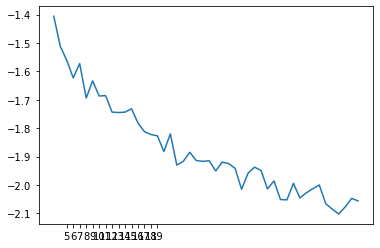

In [31]:
# Coherence scores:
coh_means = np.array([np.mean(l) for l in coh_list])
coh_stds = np.array([np.std(l) for l in coh_list])

import matplotlib.pyplot as plt
%matplotlib inline
plt.xticks(np.arange(5, 20, 1.0));
plt.plot(range(3,50+1), coh_means);
plt.fill_between(range(5,20), coh_means-coh_stds, coh_means+coh_stds, color='g', alpha=0.05);
plt.vlines([6, 12, 23], -1.1, 0, color='red', linestyles='dashed',  linewidth=1);
plt.hlines([-0.645], 5, 20, color='black', linestyles='dotted',  linewidth=0.5);
plt.ylim(0,0.4);

In [20]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

np.random.seed(42)
n_features=2000
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features, ngram_range=(1,2), stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data.review.map(lambda x: ' '.join(x)))

AttributeError: 'list' object has no attribute 'review'

In [15]:
%%time
from sklearn.decomposition import NMF

n_topics=10
n_top_words = 15
nmf = NMF(n_components=n_topics, random_state=42, alpha=.1, l1_ratio=.5).fit(tfidf)
nmf_embedding = nmf.transform(tfidf)
feature_names = tfidf_vectorizer.get_feature_names()
print("Topics found via NMF:")
for topic_idx, topic in enumerate(nmf.components_):
    print("\nTopic {}:".format(topic_idx))
    print(" ".join(['[{}]'.format(feature_names[i]) for i in topic.argsort()[:-n_top_words - 1:-1]]))
print()

NameError: name 'tfidf' is not defined

In [10]:


# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=10,
                                       passes=10,
                                       alpha='symmetric',
                                       iterations=400,
                                       per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.078*"hour" + 0.046*"delay" + 0.041*"airport" + 0.027*"day" + 0.026*"wait" '
  '+ 0.024*"staff" + 0.022*"hotel" + 0.022*"arrive" + 0.019*"time" + '
  '0.016*"connect"'),
 (1,
  '0.033*"seat" + 0.018*"food" + 0.017*"definitely" + 0.017*"service" + '
  '0.016*"experience" + 0.016*"comfortable" + 0.016*"beverage" + '
  '0.016*"amazing" + 0.014*"efficient" + 0.012*"fantastic"'),
 (2,
  '0.132*"class" + 0.122*"business" + 0.067*"lounge" + 0.026*"first" + '
  '0.022*"service" + 0.020*"upgrade" + 0.017*"offer" + 0.012*"wine" + '
  '0.009*"product" + 0.009*"experience"'),
 (3,
  '0.067*"vegetarian" + 0.056*"kind" + 0.055*"question" + 0.039*"unhelpful" + '
  '0.031*"variety" + 0.029*"train" + 0.027*"order" + 0.023*"disappointment" + '
  '0.021*"visa" + 0.019*"parent"'),
 (4,
  '0.033*"ticket" + 0.032*"customer" + 0.031*"check" + 0.023*"luggage" + '
  '0.022*"pay" + 0.022*"service" + 0.019*"call" + 0.018*"bag" + '
  '0.013*"baggage" + 0.013*"ask"'),
 (5,
  '0.045*"food" + 0.042*"crew" +

In [11]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['saudi', 'arabian', 'airlines', 'flight', 'from', 'medina', 'to', 'riyadh', 'was', 'more', 'than', 'an', 'hour', 'late', 'poor', 'inflight', 'meal', 'on', 'all', 'domestic', 'flights', 'seats', 'comfortable', 'for', 'sitting', 'and', 'was', 'even', 'able', 'to', 'take', 'nap', 'crew', 'were', 'helpful', 'and', 'aircraft', 'seemed', 'to', 'be', 'new', 'no', 'inflight', 'entertainment', 'system', 'at', 'all', 'on', 'the', 'flight', 'from', 'medina', 'to', 'riyadh']]


In [12]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

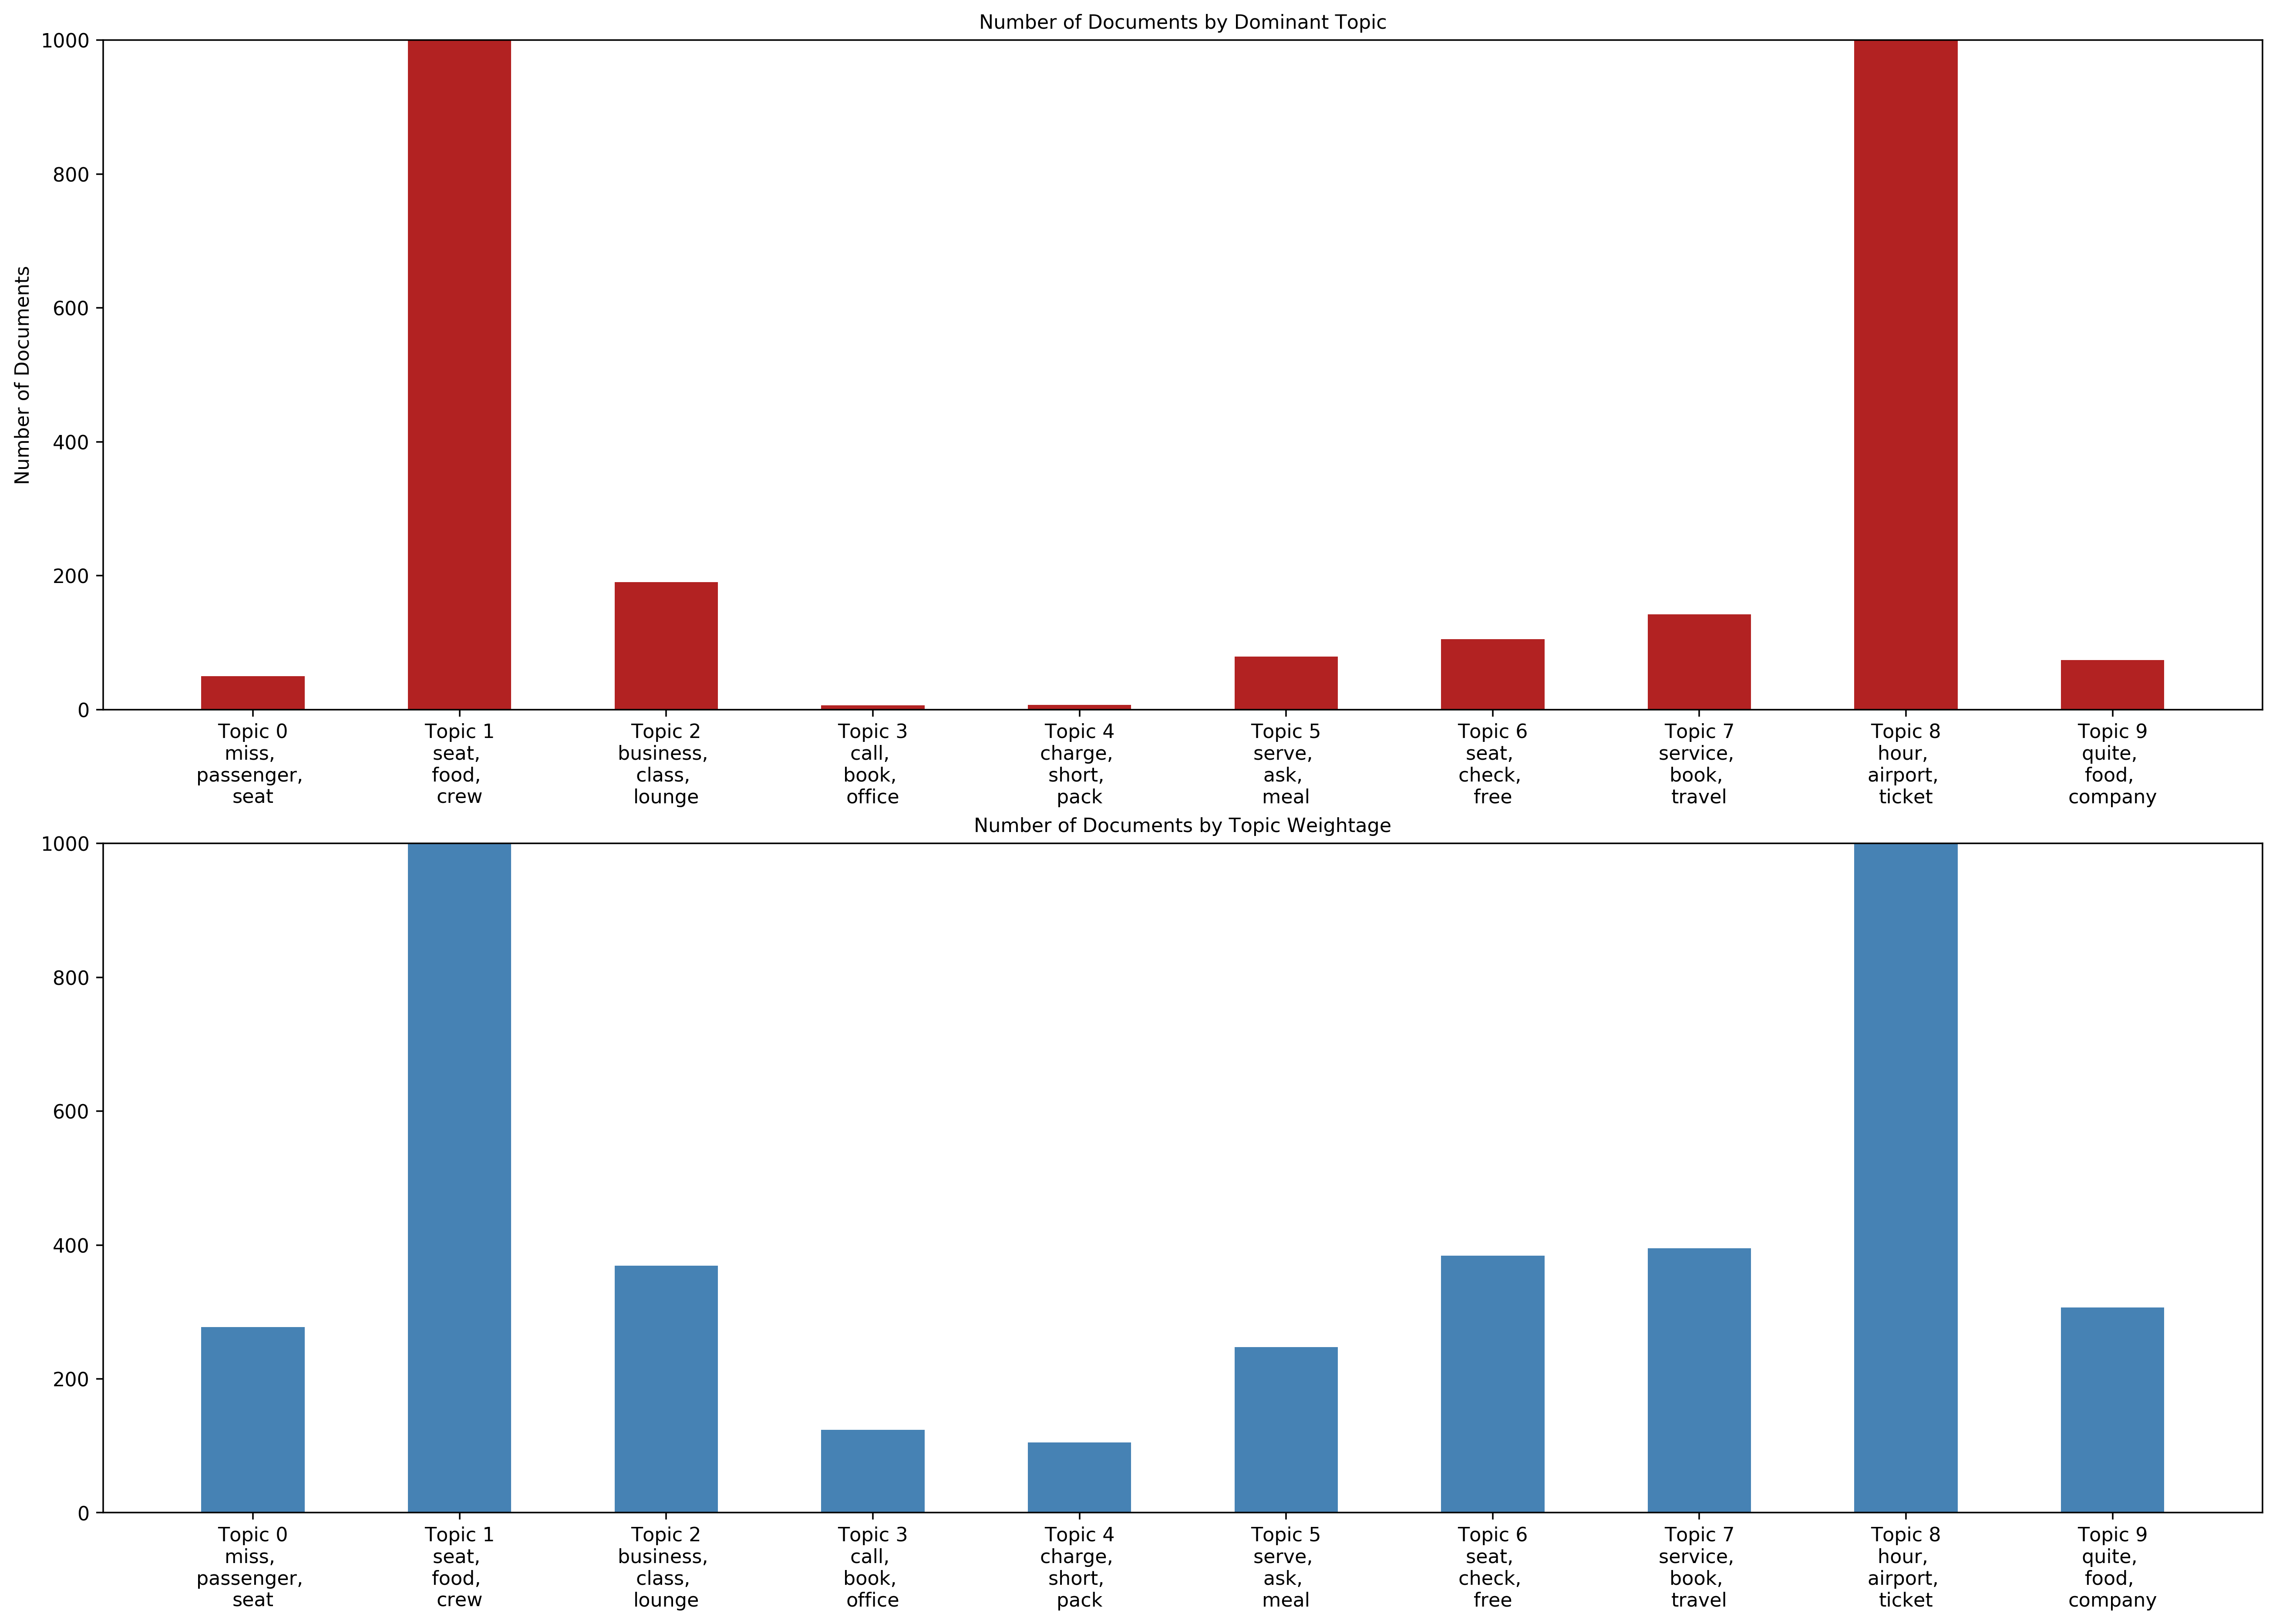

In [13]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,14), dpi=320, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()


In [14]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
import matplotlib.colors as mcolors
# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.27]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.9)
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 10
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4510 samples in 0.011s...
[t-SNE] Computed neighbors for 4510 samples in 0.274s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4510
[t-SNE] Computed conditional probabilities for sample 2000 / 4510
[t-SNE] Computed conditional probabilities for sample 3000 / 4510
[t-SNE] Computed conditional probabilities for sample 4000 / 4510
[t-SNE] Computed conditional probabilities for sample 4510 / 4510
[t-SNE] Mean sigma: 0.066061
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.404739
[t-SNE] KL divergence after 1000 iterations: 1.188233


Loading BokehJS ...

In [15]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.149435  0.161030       1        1  27.111092
1      0.224075 -0.064918       2        1  25.251865
6     -0.012754  0.086691       3        1   8.722138
2      0.124289 -0.033903       4        1   8.191967
7      0.046040 -0.126693       5        1   7.893430
0     -0.001828  0.292823       6        1   6.071330
9      0.075705 -0.191376       7        1   5.857797
5     -0.036497 -0.071258       8        1   5.730268
3     -0.292296  0.025570       9        1   2.893998
4     -0.276168 -0.077967      10        1   2.276115, topic_info=            Term         Freq        Total Category  logprob  loglift
12          seat  4993.000000  4993.000000  Default  30.0000  30.0000
26         class  2165.000000  2165.000000  Default  29.0000  29.0000
139     business  1996.000000  1996.000000  Default  28.0000  28.0000
112         food  3066.000000  3066.000000  Default  27.0000  27.0000
418       lounge  1080.000000  1080.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
691  exceptional    34.944588    66.122299  Topic10  -5.0571   3.1450
693         fact    40.994335   191.772858  Topic10  -4.8974   2.2398
58        smooth    40.240784   210.575424  Topic10  -4.9160   2.1277
539          big    40.529434   328.812805  Topic10  -4.9088   1.6892
177        happy    34.514034   167.612869  Topic10  -5.0695   2.2024

[594 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
753       2  0.990981     acceptable
580       4  0.957078         access
580       5  0.036811         access
2578      4  0.986076    accommodate
1646      1  0.989022  accommodation
...     ...       ...            ...
169       9  0.022315           work
219       9  0.987413          worst
219      10  0.009776          worst
769       9  0.127197          young
769      10  0.839500          young

[986 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 2, 7, 3, 8, 1, 10, 6, 4, 5])

In [15]:
from gensim.models import HdpModel
hdp_model = HdpModel(corpus=corpus,id2word=id2word)
hdp_model.print_topics()

[(0,
  '0.019*seat + 0.014*service + 0.013*time + 0.012*hour + 0.012*food + 0.010*crew + 0.010*class + 0.009*staff + 0.009*business + 0.008*cabin'),
 (1,
  '0.015*seat + 0.014*hour + 0.012*service + 0.012*time + 0.010*staff + 0.009*check + 0.009*airport + 0.008*food + 0.007*crew + 0.006*passenger'),
 (2,
  '0.017*seat + 0.012*service + 0.012*hour + 0.012*time + 0.010*food + 0.009*crew + 0.009*staff + 0.008*check + 0.007*class + 0.007*passenger'),
 (3,
  '0.014*seat + 0.011*time + 0.010*service + 0.009*hour + 0.009*food + 0.007*crew + 0.007*check + 0.006*staff + 0.006*cabin + 0.006*experience'),
 (4,
  '0.010*seat + 0.007*service + 0.007*time + 0.007*food + 0.006*hour + 0.006*staff + 0.005*crew + 0.005*class + 0.004*business + 0.004*passenger'),
 (5,
  '0.008*seat + 0.007*service + 0.007*food + 0.006*crew + 0.006*time + 0.004*cabin + 0.004*hour + 0.004*class + 0.004*business + 0.003*entertainment'),
 (6,
  '0.007*seat + 0.005*service + 0.005*food + 0.004*time + 0.004*crew + 0.003*class 

In [12]:
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel

In [13]:

nmf_model = Nmf(corpus=corpus, num_topics=10, id2word=id2word)
nmf_model.print_topics()

[(0,
  '0.059*"service" + 0.032*"meal" + 0.031*"time" + 0.023*"staff" + 0.023*"plane" + 0.014*"business" + 0.013*"cabin" + 0.012*"food" + 0.011*"serve" + 0.011*"entertainment"'),
 (1,
  '0.043*"time" + 0.038*"ticket" + 0.025*"travel" + 0.020*"change" + 0.013*"experience" + 0.011*"book" + 0.011*"last" + 0.010*"day" + 0.009*"pay" + 0.009*"trip"'),
 (2,
  '0.053*"hour" + 0.047*"airport" + 0.026*"food" + 0.023*"staff" + 0.022*"plane" + 0.016*"leave" + 0.013*"arrive" + 0.012*"aircraft" + 0.012*"ask" + 0.011*"delay"'),
 (3,
  '0.076*"crew" + 0.043*"food" + 0.031*"cabin" + 0.030*"ask" + 0.025*"service" + 0.020*"serve" + 0.010*"minute" + 0.010*"drink" + 0.009*"order" + 0.009*"time"'),
 (4,
  '0.071*"hour" + 0.031*"service" + 0.021*"delay" + 0.019*"customer" + 0.019*"passenger" + 0.015*"offer" + 0.015*"wait" + 0.014*"hotel" + 0.012*"day" + 0.011*"arrive"'),
 (5,
  '0.100*"seat" + 0.024*"cabin" + 0.022*"crew" + 0.017*"meal" + 0.012*"entertainment" + 0.010*"pay" + 0.009*"leg" + 0.008*"comfortable

In [14]:
# Build the LSI model
from gensim.models import LsiModel
lsi_model = LsiModel(corpus=corpus, num_topics=10, id2word=id2word)
lsi_model.print_topics()

[(0,
  '0.405*"seat" + 0.258*"hour" + 0.252*"service" + 0.250*"time" + 0.191*"food" + 0.188*"staff" + 0.176*"check" + 0.175*"class" + 0.169*"crew" + 0.163*"business"'),
 (1,
  '0.549*"seat" + -0.398*"hour" + -0.208*"airport" + -0.185*"staff" + -0.180*"delay" + 0.176*"class" + 0.151*"business" + -0.143*"ticket" + -0.141*"wait" + -0.135*"day"'),
 (2,
  '0.644*"seat" + -0.326*"class" + -0.292*"service" + -0.285*"business" + -0.203*"food" + -0.172*"crew" + -0.144*"lounge" + 0.141*"check" + -0.128*"cabin" + 0.107*"pay"'),
 (3,
  '0.455*"class" + 0.424*"business" + -0.361*"crew" + -0.225*"meal" + 0.214*"ticket" + -0.194*"cabin" + -0.168*"hour" + -0.152*"time" + -0.152*"food" + -0.145*"entertainment"'),
 (4,
  '-0.561*"hour" + 0.394*"service" + -0.262*"class" + -0.254*"business" + 0.243*"check" + 0.183*"customer" + -0.174*"delay" + -0.165*"passenger" + 0.157*"ticket" + 0.153*"staff"'),
 (5,
  '0.513*"service" + -0.496*"check" + -0.278*"staff" + 0.275*"hour" + 0.211*"customer" + -0.205*"passen

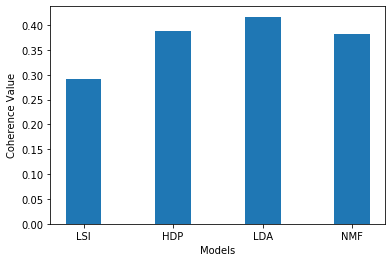

In [16]:
from gensim.models import CoherenceModel
lda_topics = [[word for word, prob in topic] for topicid, topic in lda_model.show_topics(formatted=False)]
lsi_topics = [[word for word, prob in topic] for topicid, topic in lsi_model.show_topics(formatted=False)]
hdp_topics = [[word for word, prob in topic] for topicid, topic in hdp_model.show_topics(formatted=False)]
nmf_topics = [[word for word, prob in topic] for topicid, topic in nmf_model.show_topics(formatted=False)]
lsi_coherence = CoherenceModel(topics=lsi_topics, texts=data_ready, dictionary=id2word, window_size=10).get_coherence()
hdp_coherence = CoherenceModel(topics=hdp_topics, texts=data_ready, dictionary=id2word, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=lda_topics, texts=data_ready, dictionary=id2word, window_size=10).get_coherence()
nmf_coherence = CoherenceModel(topics=nmf_topics, texts=data_ready, dictionary=id2word, window_size=10).get_coherence()
import numpy as np
def topic_model_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.4, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')
topic_model_graph([lsi_coherence, hdp_coherence, lda_coherence, nmf_coherence],
                   ['LSI', 'HDP', 'LDA', 'NMF'])
plt.rcParams['axes.facecolor'] = 'white'
